In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import json
from keras.models import model_from_json, load_model

In [14]:
import numpy as np
seed = 7
np.random.seed(seed)

In [15]:

from PIL import Image
from keras.preprocessing import image

In [16]:
from keras import backend as K 
print(K.image_data_format())

channels_last


In [17]:
def classifier_model():
    classifier=Sequential()
    classifier.add(Conv2D(32, (3, 3), input_shape = (64,64, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
    classifier.add(MaxPooling2D(pool_size = (2, 2)))
    classifier.add(Flatten())
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.summary()
    return classifier
    

In [ ]:
train_dir='eyedataset/train'
validation_dir='eyedataset/valid'
img_width=64
img_height=64
input_shape=(img_width,img_height,3)
batch_size=50
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode="binary",
)
validation_generator = test_datagen.flow_from_directory( validation_dir, 
                   target_size =(img_width,img_height), 
                   batch_size = batch_size, 
                   class_mode ='binary') 




Found 3894 images belonging to 2 classes.
Found 952 images belonging to 2 classes.


In [ ]:
cnn=classifier_model()
hist=cnn.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)
#cnn.save_weights('eyecnn.h5')
#with open('eyemodel_architecture.json', 'w') as f:
    #f.write(cnn.to_json())
cnn.save('trained_model_2.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
__________

In [20]:
history=hist

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


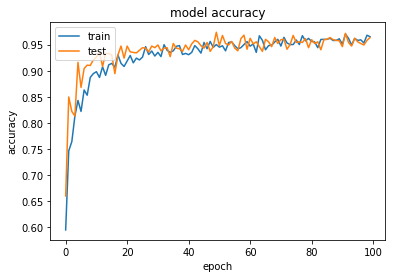

In [21]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [22]:
print(np.amax(history.history['acc']))
print(np.amax(history.history['val_acc']))
print(np.average(history.history['acc']))
print(np.average(history.history['val_acc']))

0.9699999940395355
0.9735772294726798
0.9295824281507126
0.9389157654468605


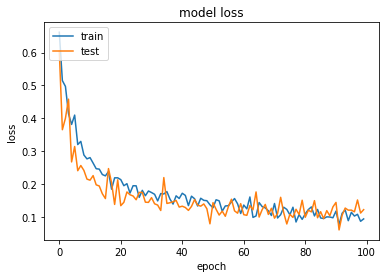

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
print(np.xmax(history.history['acc']))
print(np.xmax(history.history['val_acc']))



98.89
96.6
